# Compare different smoothing resolutions of xLASM grain size data over depth
***
* Author: Yannick E. Heiser
* Email:  wfg813@alumni.ku.dk
* Last Update:   14th of May 2023
***

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from iminuit import Minuit 
from ExternalFunctions import Chi2Regression
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['font.size'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['axes.axisbelow'] = True
import sys
import glob
import os
from tkinter import Tcl
from os.path import join
from scipy.ndimage import gaussian_filter1d
from scipy.signal import welch
from scipy.interpolate import CubicSpline, PchipInterpolator
import matplotlib.ticker as ticker
!{sys.executable} -m pip install xlrd

In [30]:
# Load xLASM
resolution_mm = {"2": 2, "5": 5, "10":10}
df_sizes = {}
file_path = "/home/jovyan/work/PICE/ResearchGroups/Stratigraphy/Yannick 2022/Data_csv/grain_sizes_depth/"

for key in resolution_mm.keys():
    print(key)
    path = file_path + "grain_data_interp_{}mm.csv".format(resolution_mm[key])
    df_sizes[key] = pd.read_csv(path)
df_sizes[list(df_sizes.keys())[0]].head()

2
5
10


,depth[m],equivalent_diameter[px],grain_size[px]
0,2002.552,303.608543,2.049157e+06
1,2002.553,312.107969,2.416072e+06
2,2002.554,296.886203,2.266391e+06
3,2002.555,282.890804,2.123016e+06
4,2002.556,328.829942,2.967209e+06


In [14]:
len(df_sizes["2"])

19705

In [15]:
len(df_sizes["5"])

19720

In [16]:
# list of indices where element exists for lower resolution but not for 7.31
for res in list(df_sizes.keys())[1:]:
    print(res)
    indices = np.array([])
    for i in range(len(df_sizes[res])):
        if df_sizes[res]["depth[m]"].iloc[i] in list(df_sizes["7.31"]["depth[m]"]):
            continue
        else:
            print(i)
            indices = np.append(indices,i)
    # Delete rows with indices 
    df_sizes[res] = df_sizes[res].drop(index=indices)

5


KeyError: '7.31'

KeyError: '12.12'

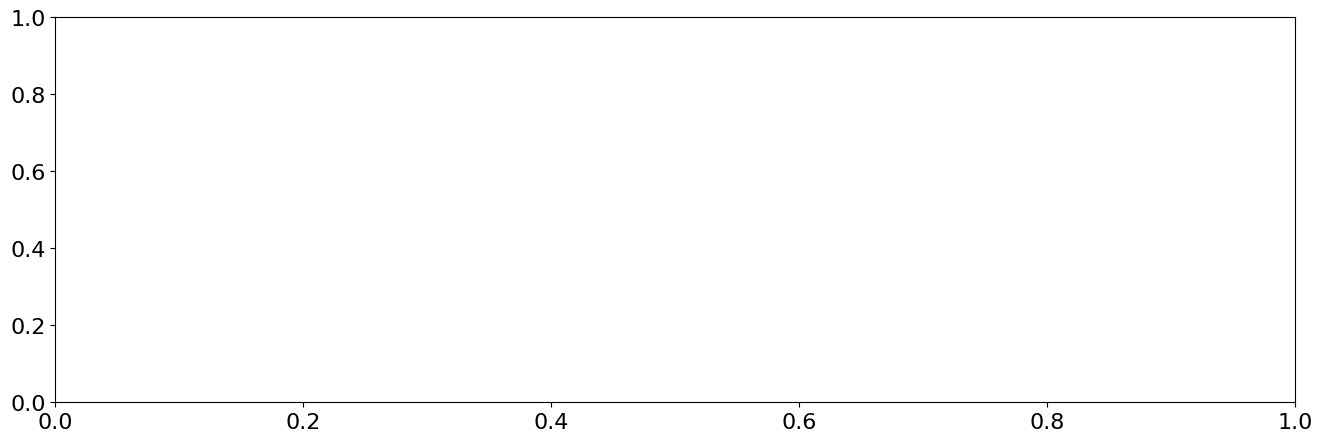

In [17]:
# Plot ratio of largest and smallest resolution
fig, ax = plt.subplots(figsize=(16, 5))
ax.plot(df_sizes["12.12"]["depth[m]"],np.array(df_sizes["8.8"]["grain_size[px]"])/np.array(df_sizes["7.31"]["grain_size[px]"]))
ax.set_xlabel('Depth top (m)')
ax.set_ylabel('Ratio grain sizes')
plt.tight_layout()
plt.show()

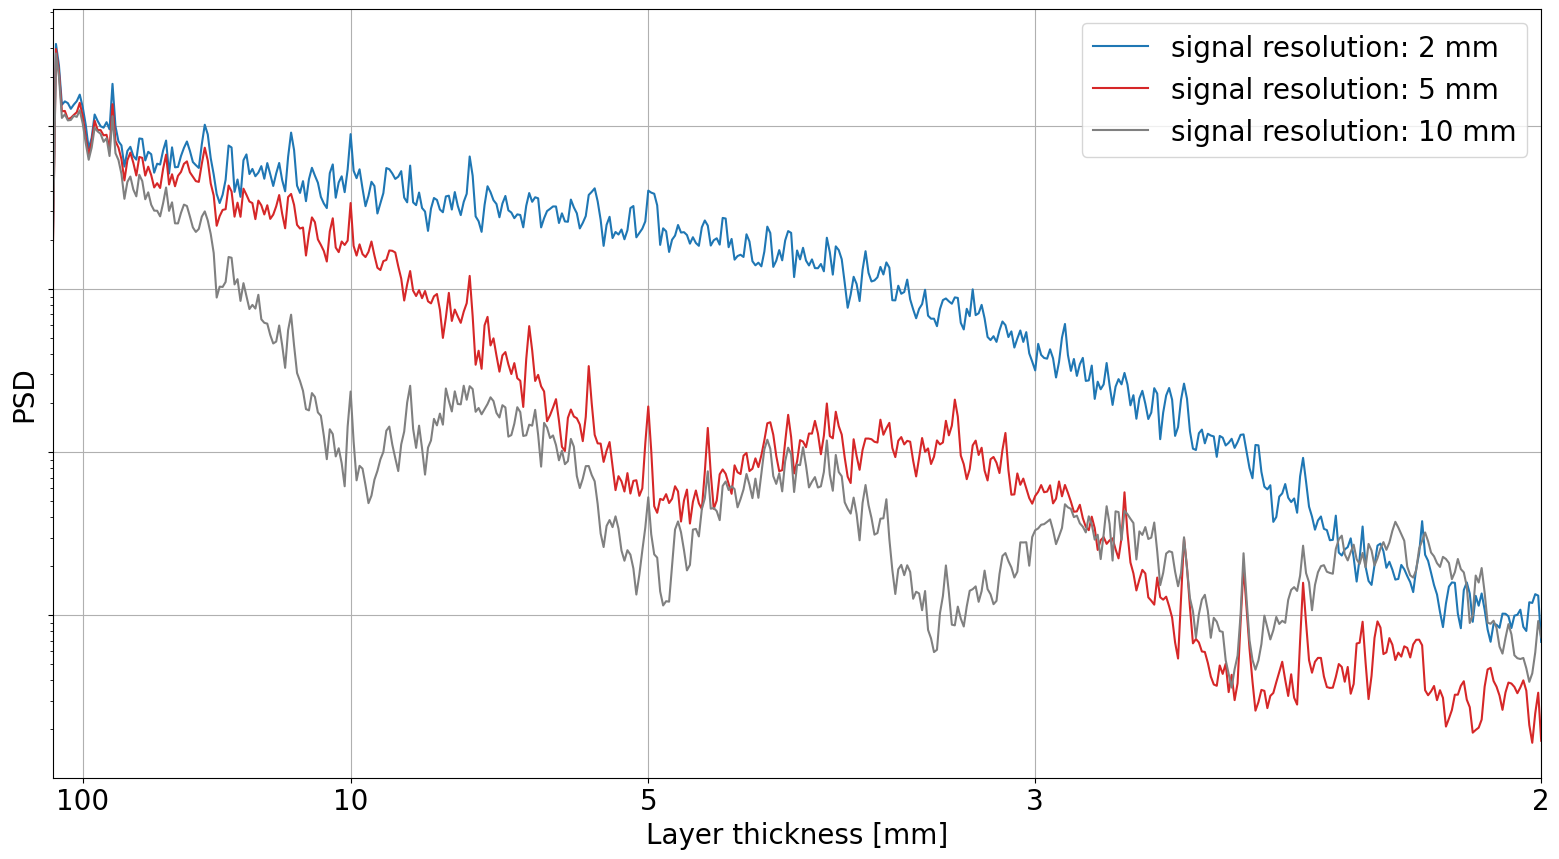

In [31]:
# Plot PSD
fs = 1 # sampling frequency in [1/mm]
fig, ax = plt.subplots(figsize=(16, 9))
for key in list(df_sizes.keys())[:1]:
    f, Pxx = welch(df_sizes[key]["grain_size[px]"],fs,nperseg = 1000)
    ax.semilogy(f, Pxx,label="signal resolution: {} mm".format(key),color="tab:blue")
for key in list(df_sizes.keys())[1:2]:
    f, Pxx = welch(df_sizes[key]["grain_size[px]"],fs,nperseg = 1000)
    ax.semilogy(f, Pxx,label="signal resolution: {} mm".format(key),color="tab:red")
for key in list(df_sizes.keys())[2:]:
    f, Pxx = welch(df_sizes[key]["grain_size[px]"],fs,nperseg = 1000)
    ax.semilogy(f, Pxx,label="signal resolution: {} mm".format(key),color="gray")
ax.set_ylim(ax.get_ylim()[0],ax.get_ylim()[1])
#ax.vlines(1/3.15,ymin=ax.get_ylim()[0],ymax=ax.get_ylim()[1],color="black")
#ax.vlines(1/5.6,ymin=ax.get_ylim()[0],ymax=ax.get_ylim()[1],color="black")
ax.set_xlim(0.0001,0.5)
ax.set_xticks([1/100,0.1,0.2,0.33,0.5])
ax.set_xticklabels([100,int(1/0.1),int(1/0.2),int(1/0.33),int(1/0.5)])
ax.set_yticklabels([])
ax.set_xlabel('Layer thickness [mm]')
ax.set_ylabel('PSD')
ax.legend()
ax.grid()
fig.tight_layout()
fig.savefig("Plots/23_comparing_signal_resolution.png",dpi=100)
fig.show()